In [5]:
from astropy.table import Table
from astropy.io.fits import getdata
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord

In [6]:
sf = '../catalog/fits/straycats.fits'

In [7]:
straycat = Table.read(sf)
print(straycat.columns)

<TableColumns names=('Classification','SL Target','Target Type','SEQID','Module','Primary Target','Exposure (s)','RA','DEC','Notes','TIME','END_TIME')>


In [8]:
for key in straycat.columns:
    if straycat[key].dtype.str.startswith('|S'):
        straycat[key] = straycat[key].astype('str') 
df = straycat.to_pandas()

In [9]:
# Create galactic coordiantes:

ra = df['RA'].values
dec = df['DEC'].values

coords = SkyCoord(ra, dec, unit = 'deg')

In [78]:
df['GalLon']= coords.galactic.l.deg
df['GalLat']= coords.galactic.b.deg

# Shift so that galactic lon is in center of frame:


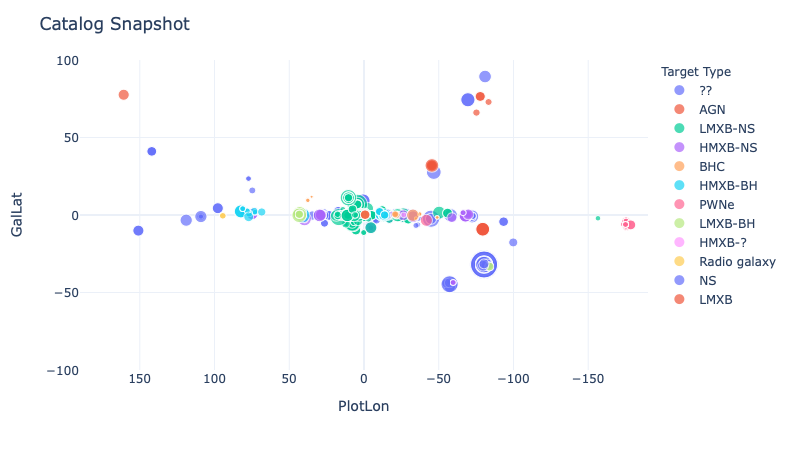

In [93]:

import plotly.express as px
import plotly.io as pio

df['PlotLon'] = (df['GalLon'] + 180)%360 - 180


fig = px.scatter(df, x='PlotLon', y='GalLat'
                 ,size='Exposure (s)'
                  , hover_data=['SL Target', 'Primary Target', 'Exposure (s)', 'Notes']
                  ,color= 'Target Type')

fig.update_layout(template='plotly_white')
fig.update_layout(title='Catalog Snapshot')

fig.update_layout(yaxis=dict(range=[-100,100]),xaxis=dict(range=[190, -190]))

# fig.update_xaxes(
#     visible=False,
# )
# fig.update_yaxes(
#     visible=False,
# )

fig.show()

pio.write_html(fig, file='straycat_galactic.html')


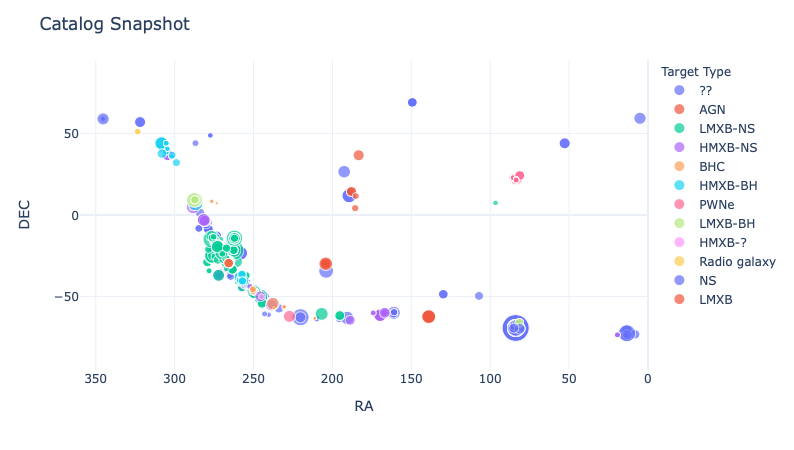

In [91]:

import plotly.express as px
import plotly.io as pio


fig = px.scatter(df, x='RA', y='DEC'
                 ,size='Exposure (s)'
                  , hover_data=['SL Target', 'Primary Target', 'Exposure (s)', 'Notes']
                  ,color= 'Target Type')

fig.update_layout(template='plotly_white')
fig.update_layout(title='Catalog Snapshot')

fig.update_layout(yaxis=dict(range=[-95,95]),xaxis=dict(range=[360, 0]))

fig.show()

pio.write_html(fig, file='straycat_radec.html')



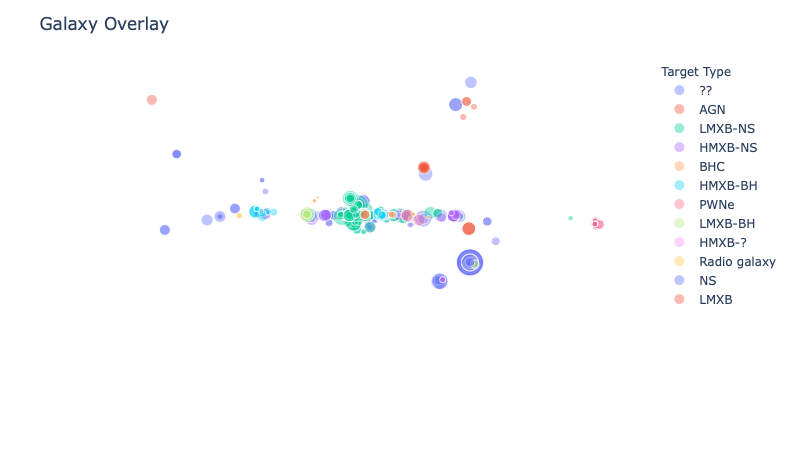

In [103]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Constants
img_width = 1600
img_height = 900
scale_factor = 0.5



scalex=scale_factor*img_width*( ( ( (360 - df['GalLon']) + 180) % 360) / 360)
scaley=0.5*scale_factor*img_height*(df['GalLat']/90) + 0.5*scale_factor*img_height

df['x'] = scalex
df['y'] = scaley
# fig.add_trace(go.Scatter(x=scalex,
#                          y=scaley,
#                          mode='markers',
#                          marker=dict(
#                              opacity=0.5,
#                              size=df['Exposure (s)']/25000
#                          )
#                         )

fig = px.scatter(df, x='x', y='y'
                 ,size='Exposure (s)'
                  , hover_data=['SL Target', 'Primary Target', 'Exposure (s)', 'Notes']
                  ,color= 'Target Type', opacity=0.4)
fig.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

fig.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)
#import plotly.express as px
#fig = px.scatter(df, x='GalLon', y='GalLat'
#                 ,size='Exposure (s)'
#                  , hover_data=['SL Target', 'Primary Target', 'Exposure (s)', 'Notes']
#                  ,color= 'Target Type')

#from skimage import io
#img = io.imread('https://cdn.eso.org/images/screen/eso0932a.jpg')
#fig.add_trace(go.Image(z=img, sizex=1, sizey=1, x=0, y=0, sizing="stretch"))

fig.add_layout_image(
        dict(
            source="https://cdn.eso.org/images/large/eso0932a.jpg",
            xref="x",
            yref="y",
            x=0,
            sizex=img_width * scale_factor,
            y=img_height * scale_factor,
            sizey=img_height * scale_factor,
            sizing="stretch",
            layer="below")
)


fig.update_layout(template='plotly_white')
fig.update_layout(title='Galaxy Overlay')


fig.show()


pio.write_html(fig, file='galaxy_overlay.html')


#By ESO/S. Brunier - http://www.eso.org/public/images/eso0932a/, CC BY 4.0, https://commons.wikimedia.org/w/index.php?curid=9559670

In [111]:
sl = df[df['Classification']=='SL'].reset_index(drop=True)

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Classification</th>\n      <th>SL Target</th>\n      <th>Target Type</th>\n      <th>SEQID</th>\n      <th>Module</th>\n      <th>Primary Target</th>\n      <th>Exposure (s)</th>\n      <th>RA</th>\n      <th>DEC</th>\n      <th>Notes</th>\n      <th>TIME</th>\n      <th>END_TIME</th>\n      <th>GalLon</th>\n      <th>GalLat</th>\n      <th>PlotLon</th>\n      <th>x</th>\n      <th>y</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>SL</td>\n      <td>2MASX J09172716-6456271</td>\n      <td>AGN</td>\n      <td>60401020002</td>\n      <td>A</td>\n      <td>IRAS_09149m6206</td>\n      <td>110899.00</td>\n      <td>138.9791</td>\n      <td>-62.3074</td>\n      <td>SL on both</td>\n      <td>58323.306356</td>\n      <td>58325.788995</td>\n      <td>280.579816</td>\n      <td>-9.203718</td>\n      <td>-79.420184</td>\n      <td>576.489299</td>\n      